In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

from credit_g_dataset import get_preprocessed_credit_g_dataset

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 6)

# Load version 3 of the dataset credit-g

In [2]:
%%capture
X_train, X_validation, X_test, y_train, y_validation, y_test = get_preprocessed_credit_g_dataset()

## Train the model on the training set and adjust K on the validation set

In [3]:
max_acc = 0
max_acc_k = 0
best_dist = ""
distance_str_ls = ['manhattan', 'cityblock', 'cosine', 'euclidean']

for distance_str in distance_str_ls:
    for k in range(1,100,1):
        model = KNeighborsClassifier(n_neighbors=k, metric=distance_str).fit(X_train, y_train)
    
        y_predicted = model.predict(X_validation)
        
        # Get performance metrics
        accuracy = accuracy_score(y_validation, y_predicted)
        recall = recall_score(y_validation, y_predicted,  average='binary')
        precision = precision_score(y_validation, y_predicted, average='binary')
        f1 = f1_score(y_validation, y_predicted, average='binary')
    
    
        if accuracy > max_acc:
            max_acc = accuracy
            max_acc_k = k
            best_dist = distance_str        

### Run the grid search for best K again in order to populate the list of obtained performance that will be plotted right afterwards 

In [4]:
performance_dict = {'k':[], 'precision':[], 'recall':[], 'f1':[],}
for k in range(1,100,1):
        model = KNeighborsClassifier(n_neighbors=k, metric=best_dist).fit(X_train, y_train)
    
        y_predicted = model.predict(X_validation)
        
        # Get performance metrics
        accuracy = accuracy_score(y_validation, y_predicted)
        recall = recall_score(y_validation, y_predicted,  average='binary')
        precision = precision_score(y_validation, y_predicted, average='binary')
        f1 = f1_score(y_validation, y_predicted, average='binary')
    
        performance_dict['k'].append(k)
        performance_dict['precision'].append(precision)
        performance_dict['recall'].append(recall)
        performance_dict['f1'].append(f1)

## Plot the performance vs K

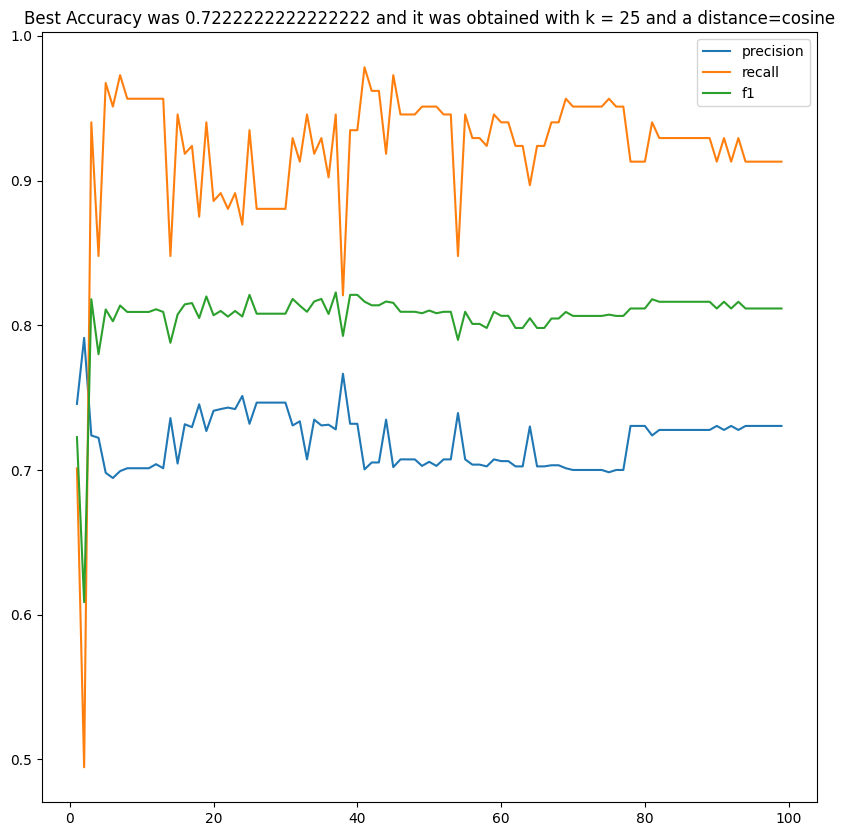

In [5]:
plt.figure(figsize=(10, 10))
plt.plot(performance_dict['k'], performance_dict['precision'], label="precision")
plt.plot(performance_dict['k'], performance_dict['recall'], label="recall")
plt.plot(performance_dict['k'], performance_dict['f1'], label="f1")
plt.title(f"Best Accuracy was {max_acc} and it was obtained with k = {max_acc_k} and a distance={best_dist}")
plt.legend()
plt.show()

## Run on the test set and use training and validation sets for training

In [6]:
k = max_acc_k
X_train = np.concatenate((X_train, X_validation))
y_train = np.concatenate((y_train, y_validation))
model = KNeighborsClassifier(n_neighbors=k,metric=best_dist).fit(X_train, y_train)
y_predicted = model.predict(X_test)

# Get performance metrics
accuracy = accuracy_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted,  average='binary')
precision = precision_score(y_test, y_predicted, average='binary')
f1 = f1_score(y_test, y_predicted, average='binary')

print("accuracy =", accuracy)
print("precision =", precision)
print("recall =", recall)
print("f1 =", f1)

accuracy = 0.71
precision = 0.725
recall = 0.8923076923076924
f1 = 0.8


In [7]:
confusion_matrix(y_test, y_predicted)

array([[13, 22],
       [ 7, 58]], dtype=int64)

In [8]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1])